<a href="https://colab.research.google.com/github/Shyam-G-Sundhar/PCA_Example/blob/main/PCA_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import load_digits
df=load_digits()

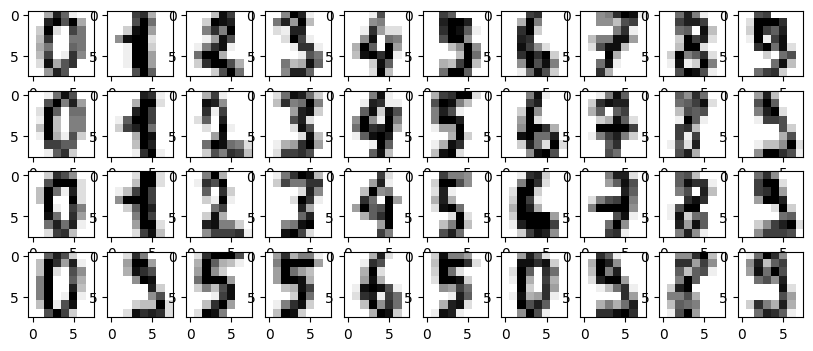

In [ ]:
def plot_digits(data):
  fig,axes=plt.subplots(4,10,figsize=(10,4))
  for i,ax in enumerate(axes.flat):
    ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest')
plot_digits(df.data)

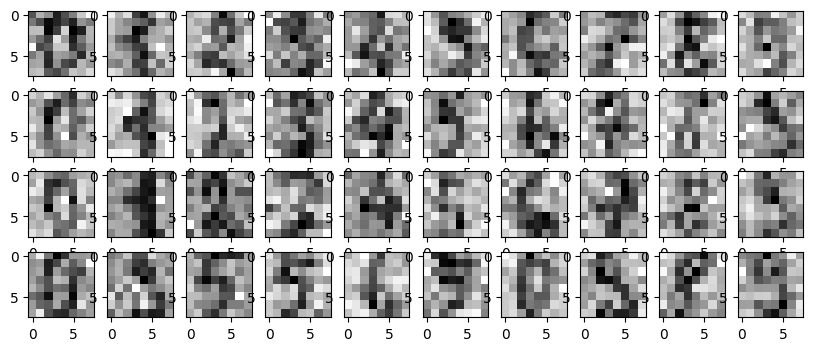

In [ ]:
noisy=np.random.normal(df.data,4)
plot_digits(noisy)

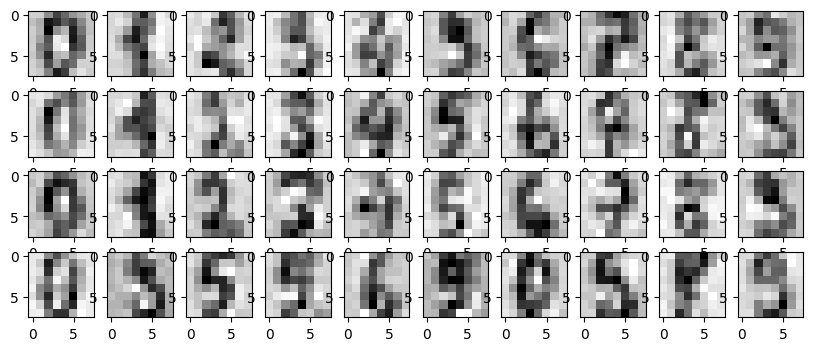

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.6)
pca.fit(noisy)
red=pca.transform(noisy)
org=pca.inverse_transform(red)
plot_digits(org)

In [ ]:
from sklearn.datasets import fetch_california_housing
df1=fetch_california_housing()
df2=pd.DataFrame(df1.data,columns=df1.feature_names)
df2

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

In [ ]:
pd.DataFrame(df1.target,columns=df1['target_names'])

MedHouseVal
0            4.526
1            3.585
2            3.521
3            3.413
4            3.422
...            ...
20635        0.781
20636        0.771
20637        0.923
20638        0.847
20639        0.894

[20640 rows x 1 columns]

In [ ]:
df3=pd.concat([df2,pd.DataFrame(df1.target,columns=df1['target_names'])],axis=1)
df3

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

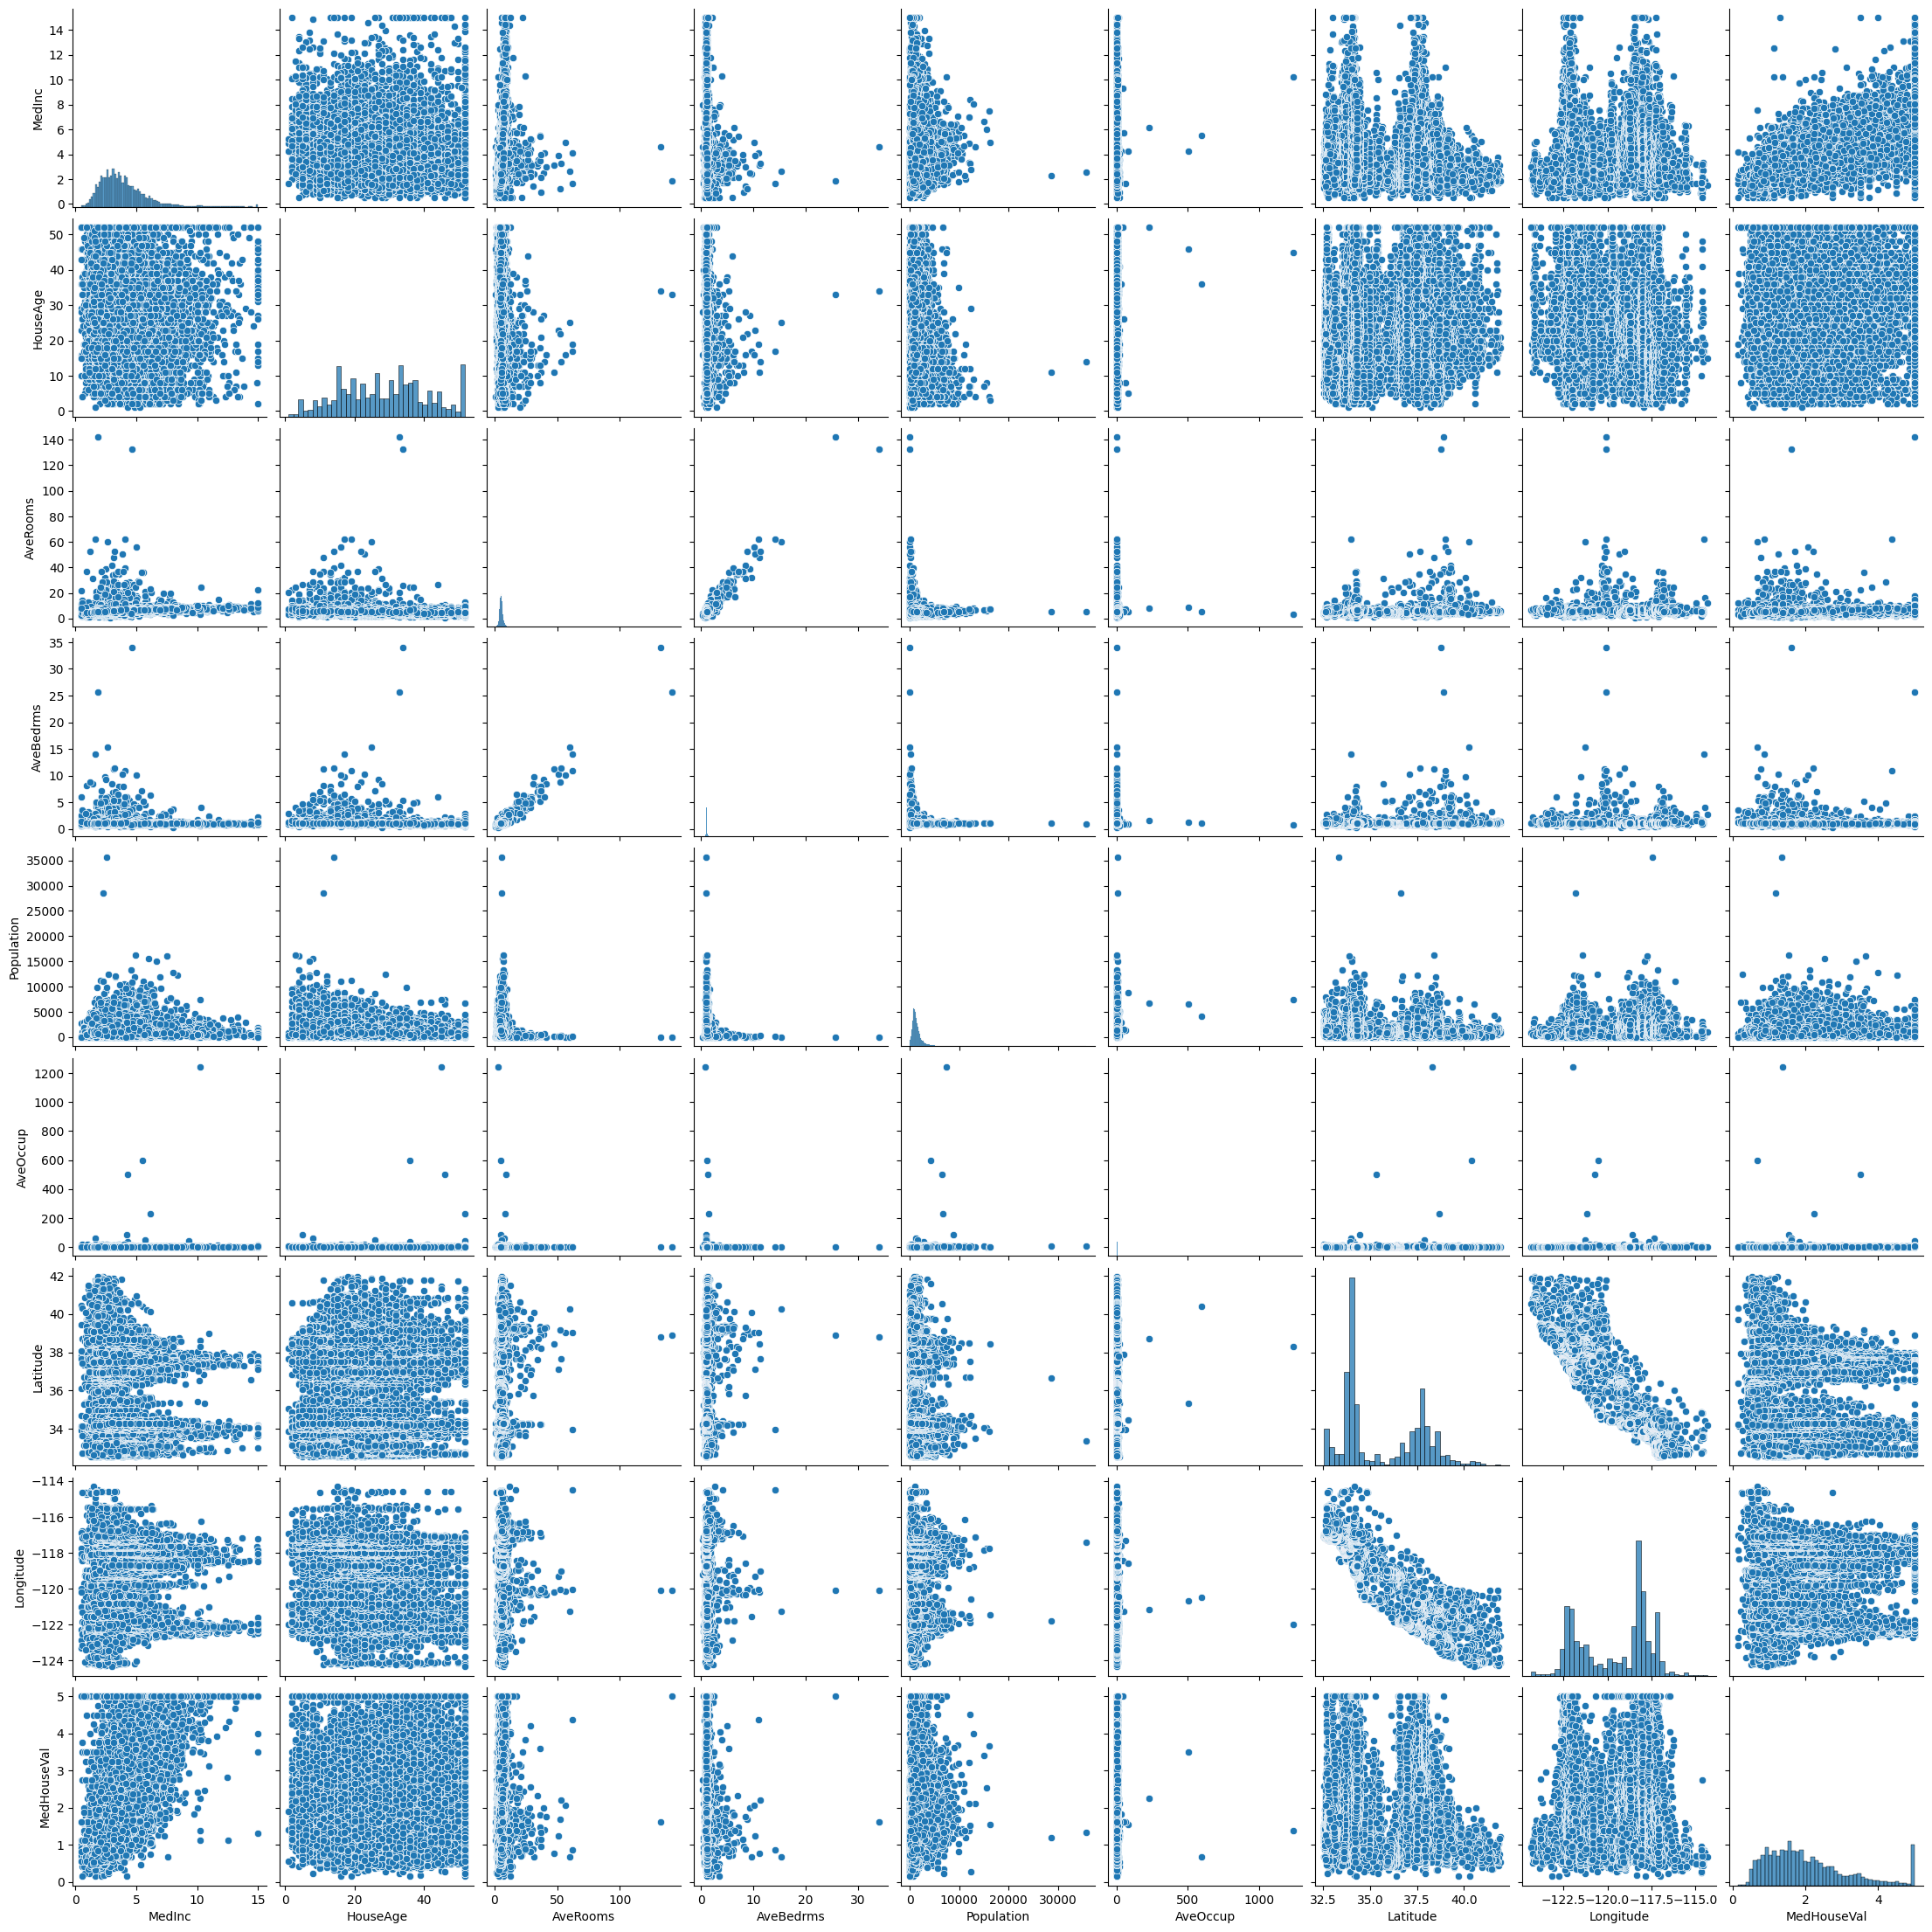

In [ ]:
sns.pairplot(df3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df3)
scaled_data=scaler.transform(df3)
scaled_data

array([[ 2.34476576,  0.98214266,  0.62855945, ...,  1.05254828,
        -1.32783522,  2.12963148],
       [ 2.33223796, -0.60701891,  0.32704136, ...,  1.04318455,
        -1.32284391,  1.31415614],
       [ 1.7826994 ,  1.85618152,  1.15562047, ...,  1.03850269,
        -1.33282653,  1.25869341],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ...,  1.77823747,
        -0.8237132 , -0.99274649],
       [-1.05458292, -0.84539315, -0.04021111, ...,  1.77823747,
        -0.87362627, -1.05860847],
       [-0.78012947, -1.00430931, -0.07044252, ...,  1.75014627,
        -0.83369581, -1.01787803]])

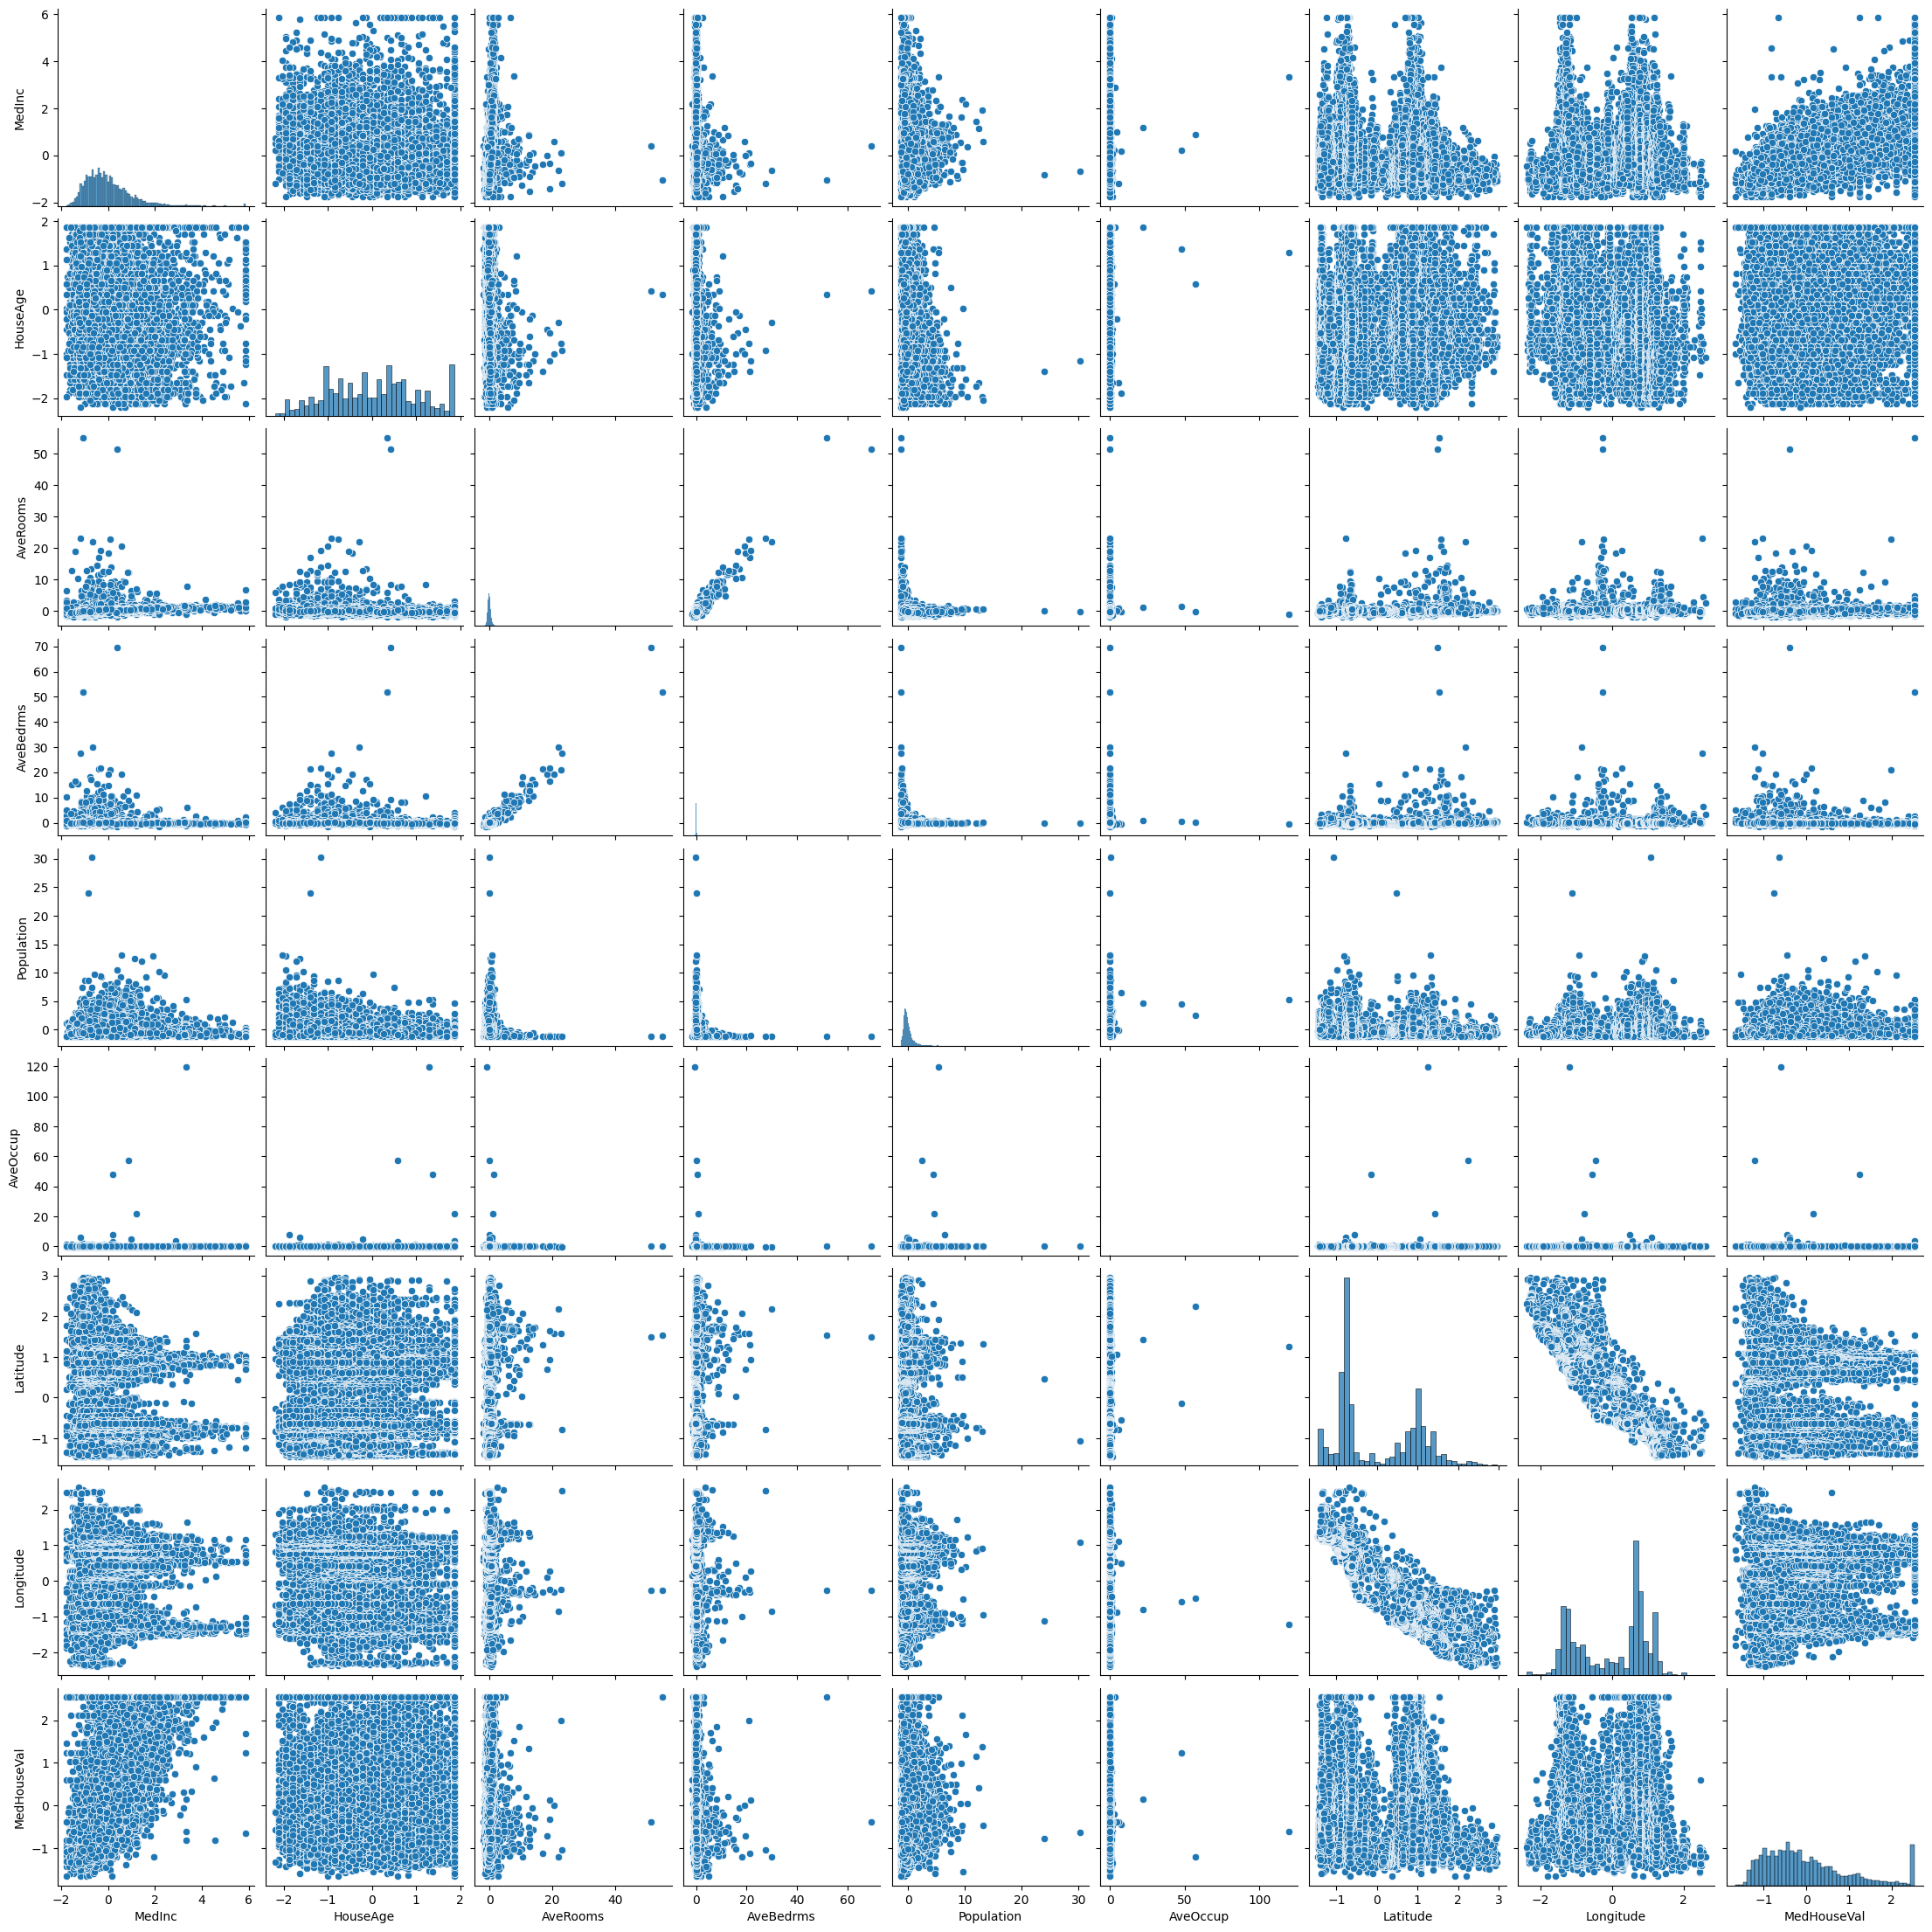

In [ ]:
sns.pairplot(pd.DataFrame(scaled_data,columns=df3.columns))